# Project: Investigate a Dataset (No-show appointments)
                       
> Date:           Project due date -  8/14/2018 (June Cohort 20180612)

> By:             Quang Luong

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis is on a dataset, noshowappointments-kagglev2-may-2016.csv, which shows patient info and their appointment no-shows of medical facilities in Brazil.  The purpose is to find if there are factors in determining if a patient will show up for their scheduled appointments.  The dataset contains the following:  
>-   General information about a patient - patient id, gender, and age.<br>
>-   Health issues such as  - hypertension, diabetes, alcoholism, and Handicap.<br>
>-   Whether or not a patient is on a welfare program.<br>
>-   The date the appointment was scheduled and the appointment day and whether patient showed up or not.<br>



> **Questions Posed in this analysis**:<br>
-  Are patients on a scholarship program a factor in determining meeting the scheduled appointment?<br>
-  Are patients with health issues, such as, Hypertension, Diabetes, or alcoholism, factors in determining meeting the scheduled appointment? <br>
 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## A. Data Wrangling

#### 1. General Properties

Load the data set and print out a few lines. 

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Getting a general idea of the columns and datatype:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that there are:
- No null values.
- 110,527 rows of records and 14 columns
- The ScheduledDay and AppointmentDay need to be in datetime format
- Column spelling needs correction (Hipertension, etc)

**Column descriptions:**
- **PatientId:**            Unique number for patient
- **AppointmentID:**        Unique number for appointment
- **Gender:**               Male or female
- **ScheduledDay:**         Day the appointment was made
- **AppointmentDay:**       Day the appointment occurs
- **Age:**                  Age of patient in years
- **Neighbourhood:**        Hospital location
- **Scholarship:**          Whether or not the patient is on a welfare program
- **Hipertension:**         Whether or not the patient has hypertension (0=no, 1=yes)
- **Diabetes:**             Whether or not the patient has Diabetes (0=no, 1=yes)
- **Alcoholism:**           Whether or not the patient has Alcoholism (0=no, 1=yes)
- **Handcap:**              Whether or not the patient has a handicap (0=no, 1=yes)
- **SMS_received:**         Whether or not the patient has hypertension (0=no, 1=yes)
- **No-show:**              Whether of not the patient missed an appointment 


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We see Age of -1, most likely this is a typo.  Will check further to see how many and if this is a mistake:


In [5]:
df.query('Age== -1') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since there is only one and most likely a typo, we'll leave this in as it would not make too much of a difference in our analysis.
<BR>

#### 2. Data Cleaning:

Some column names need clarifications(renaming) and reformatting: 
1. Renaming columns:<br>
    a. Hipertension to Hypertension    
    b. Handcap to Handicap<br>
    c. No-show to no_show
2. Day fields need to be date format (although this is not one of the variables we are considering in our analysis/questions posed) 
3. Changing Patient id from a float to an int (just to see the entire Id number; also not a variable in our analysis/questions posed)


##### 2.1.1 Renaming the column names:

In [6]:
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'no_show'}, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


##### 2.1.2 Noticed and confirmed that Appointment day has 00:00 time.  (Appointment time probably is not being captured in this dataset/system)

In [7]:
df['AppointmentDay'].unique() 

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

<BR><BR>
Time in the AppointmentDay can be ignored as they are all 00:00.  
Time in the ScheduledDay is mostly not important and not part of our analysis.<BR>
Converting to datetime format:


In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


<BR><BR>

##### 2.1.3 From the above, the patient id is a float.  We would like to see the entire number so converting to integer:

In [9]:
df['PatientId'] = df['PatientId'].astype(int)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


<BR>
    

##### 2.2 Checking the variables involved in this analysis:
>The Dependent variable will be:
>1. no_show 

>And the independent variables in our analysis will be: 
>1. Scholarship
>2. Hypertension
>3. Diabetes
>4. Alcoholism

In [10]:
print('Unique values for: ')
print('scholarship: {}'.format(df.Scholarship.unique()))
print('Hypertension: {}'.format(df.Hypertension.unique()))
print('Diabetes: {}'.format(df.Diabetes.unique()))
print('Alcoholism: {}'.format(df.Alcoholism.unique()))
print('No-show: {}'.format(df.no_show.unique()))


Unique values for: 
scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
No-show: ['No' 'Yes']


The values above appear to be straight-forward. No further data cleaning is needed.

<BR><BR>

<a id='eda'></a>
## B. Exploratory Data Analysis


### Question 1: Are patients on the scholarship program a factor in determining meeting the scheduled appointment?

##### Note:  there are cases where one patient has multiple events/records/schedules.  This would affect the show/no show occurrences depending on what we want  (perhaps how likely is a specific person to miss an appointment?):

In [11]:
df.duplicated('PatientId').sum()

48228

In [12]:
#get total pop. of scholarship and pop. of non-scholarship
pop_schol = df.groupby(['Scholarship'])['no_show'].count()
print('Pop with scholarship: {}'.format(pop_schol[1]))
print('Pop with WITHOUT scholarship: {}'.format(pop_schol[0]))
pop_schol

Pop with scholarship: 10861
Pop with WITHOUT scholarship: 99666


Scholarship
0    99666
1    10861
Name: no_show, dtype: int64

<BR>
##### Scholarship program VS. Show/no-show:

In [13]:
# has scholarship and shows 
show_and_scholar = df.query('no_show == "No"').groupby(['Scholarship'])['no_show'].count()
noshow_and_scholar = df.query('no_show == "Yes"').groupby(['Scholarship'])['no_show'].count()

#  NO-SHOW rate on the program:
on_program_missed_appt = (noshow_and_scholar[1]/pop_schol[1]) * 100 
print('ON scholarship and Missed appt %: {}'.format(on_program_missed_appt))


# SHOW rate on the program: 
on_program_show_up = (show_and_scholar[1]/pop_schol[1]) * 100
print('ON scholarship and showed up %: {}'.format(on_program_show_up))

print('*'*50)

#  NO-SHOW rate NOT ON the program:
no_program_missed_appt = (noshow_and_scholar[0]/pop_schol[0]) * 100
print('NO scholarship and Missed appt %: {}'.format(no_program_missed_appt))


#  SHOW rate NOT on the program:
no_program_show_up = (show_and_scholar[0]/pop_schol[0]) * 100
print('NO scholarship and showed up %: {}'.format(no_program_show_up))


ON scholarship and Missed appt %: 23.73630420771568
ON scholarship and showed up %: 76.26369579228432
**************************************************
NO scholarship and Missed appt %: 19.807155900708366
NO scholarship and showed up %: 80.19284409929163


<BR>
##### Percent of shows/no-shows when __ON__ scholarship:

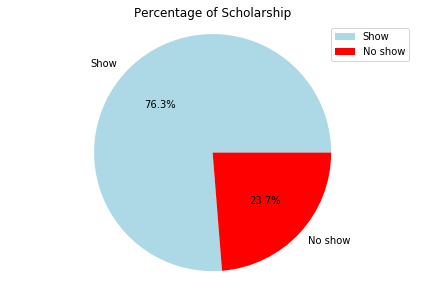

In [14]:
labels = ['Show', 'No show']
sizes = [ on_program_show_up ,on_program_missed_appt]
colors = ['lightblue', 'red']
patches= plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
#plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Scholarship')
plt.legend()
plt.show()


<BR><BR>

##### Percent of shows/no-shows when __NOT ON__ scholarship:

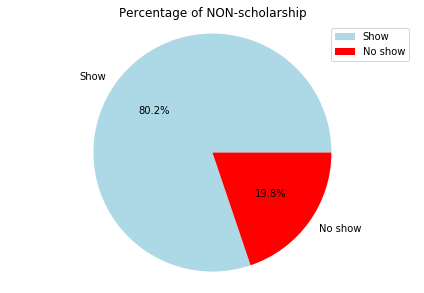

In [15]:
labels = ['Show', 'No show']
sizes = [ no_program_show_up ,no_program_missed_appt]
colors = ['lightblue', 'red']
patches= plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
#plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of NON-scholarship')
plt.legend()
plt.show() 

As shown above, on the surface the scholarship program does not seem to have much effect on the shows/no-shows. The Scholarship program could help in determining a no-show but further analysis is required, such as:

1. one patient with many scheduled appointments & outcomes affect the result strongly.
   - cases like these, maybe a weigthting score or average could be assigned to each patient and determine a total count from there. 
2. Also, the same patient may be on the scholarship program for some appointments and not be on the program for other appointments.

<BR><BR>
### Question 2: Are patients with health issues, such as, Hypertension, Diabetes, or Alcoholism, factors in determining meeting the scheduled appointment?

##### Hypertension and shows/no-shows

In [16]:
hypertension_brkdown = df.groupby(['Hypertension', 'no_show']).count()['PatientId']
hypertension_brkdown

Hypertension  no_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: PatientId, dtype: int64

In [17]:
# get count of SHOWS for Hypertension
hypertension = hypertension_brkdown[1, 'No']

# get count of SHOWS for NO Hypertension
no_hypertension = hypertension_brkdown[0, 'No']

# get count of total hypertension
hypertension_total = df.Hypertension.value_counts()
hypertension_total


0    88726
1    21801
Name: Hypertension, dtype: int64

In [18]:
#calculate the percentage (hyper/total pop. of hypertension)
hypertension_show_percent = (hypertension/hypertension_total[1]) * 100
hypertension_show_percent

82.698041374248888

In [19]:
#calculate the percentage (nonhyper/total pop. of hypertension)
no_hyper_show_percent = (no_hypertension/hypertension_total[0]) * 100
no_hyper_show_percent

79.096319004575889

##### Percent of No-shows VS. Hypertension:

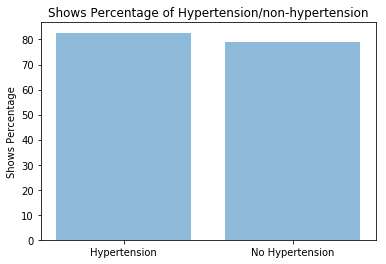

In [20]:
objects = ('Hypertension', 'No Hypertension')
y_pos = np.arange(len(objects))
rate = [hypertension_show_percent, no_hyper_show_percent]

plt.bar(y_pos, rate, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Shows Percentage')
plt.title('Shows Percentage of Hypertension/non-hypertension')
 
plt.show()

From the above it appears that those with hypertension has a higher show rate (82%) than those without hypertension (79%). 

Hypertension may be a factor in determining no-shows.

<BR>
##### Diabetes and shows/no-shows

In [21]:
diabete_brkdown = df.groupby(['Diabetes', 'no_show']).count()['PatientId']
diabete_brkdown

Diabetes  no_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: PatientId, dtype: int64

In [22]:
# get count of SHOWS for Diabete
diabetes = diabete_brkdown[1, 'No']

# get count of SHOWS for NOn diabetic
non_diabetes = diabete_brkdown[0, 'No']

# get count of total 
diabetes_total = df.Diabetes.value_counts()
diabetes_total


0    102584
1      7943
Name: Diabetes, dtype: int64

In [23]:
#calculate percentage of diabetic & nondiabetic 
diabete_show_percent = (diabetes/diabetes_total[1]) * 100
diabete_show_percent

81.99672667757774

In [24]:
non_diabete_show_percent = (non_diabetes/diabetes_total[0]) * 100
non_diabete_show_percent

79.637175387974736

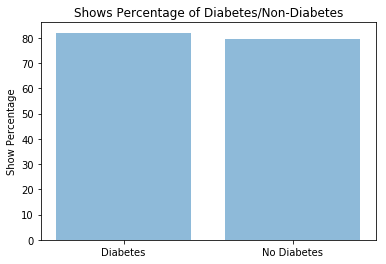

In [25]:
objects = ('Diabetes', 'No Diabetes')
y_pos = np.arange(len(objects))
rate = [diabete_show_percent, non_diabete_show_percent]
plt.bar(y_pos, rate, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Show Percentage')
plt.title('Shows Percentage of Diabetes/Non-Diabetes')
plt.show()

From the graph, although there is a slight difference in the show-up rate so Diabetes could be a factor in determining the visit rates

<BR>
##### Alcoholism and shows/no-shows

In [26]:
alcohol_brkdown = df.groupby(['Alcoholism', 'no_show']).count()['PatientId']
alcohol_brkdown

Alcoholism  no_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: PatientId, dtype: int64

In [27]:
# count of no_shows for alcoholism
alcoholism = alcohol_brkdown[1, 'No']

#count of no_shows for non-alcohol
non_alcohol = alcohol_brkdown[0, 'No']

alcohol_total = df.Alcoholism.value_counts()
alcohol_total

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [28]:
#  percentage for alcoholism
alcohol_percent = (alcoholism/alcohol_total[1]) * 100
alcohol_percent

79.851190476190482

In [29]:
#  percentage for non-alcoholism
non_alcohol_percent = (non_alcohol/alcohol_total[0]) * 100
non_alcohol_percent

79.805350527681099

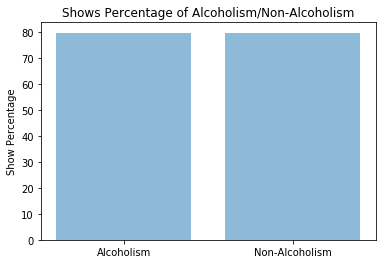

In [30]:
objects = ('Alcoholism', 'Non-Alcoholism')
y_pos = np.arange(len(objects))
rate = [alcohol_percent, non_alcohol_percent]
plt.bar(y_pos, rate, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Show Percentage')
plt.title('Shows Percentage of Alcoholism/Non-Alcoholism')
plt.show()

From the graph above, both groups of alcoholism and non-alcoholism show-up rate are very close (around 79.8% each) to each other.

Most likely, Alcoholism may not be a good factor in determining whether a patient will show up for an appointment.

<a id='conclusions'></a>
## C. Conclusions

From the findings above it is not definitive to say whether one feature stands out as a clear predictor of no-shows as the show rates are pretty close.  What's odd and counter-intuitive is that it appears that people that are on the welfare program (Scholarship) seem to miss more appointments than people not on the program.   

Perhaps if the dataset contains information as to what kind of appointment then maybe that could be a factor as well in why a patient would miss an appointment (certain appointment maybe more important than others). Also if there was an appointment time then maybe a certain time could be why people are missing appointments (too early in the day or too late in the day).

Scholarship, Hypertension, and Diabetes could be a factor in determining a no-show, but this would be a tentative conclusion and more statistical testing would be necessary.



In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Resources:

- https://pythonprogramming.net/bar-chart-histogram-matplotlib-tutorial/

- https://pythonspot.com/matplotlib-pie-chart/

- https://pythonspot.com/matplotlib-bar-chart/